In [1]:
# Import Dependencies
import pandas as pd
import numpy
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [2]:
prices_prod_df = pd.read_csv('./Resources/prices_prod.csv')
prices_prod_df

,year_month,date,geography,type,avg_price,price_total_volume,four_zero_four_six_units,four_two_two_five_units,four_seven_seven_zero_units,total_bags,...,l_bags,xl_bags,status,prod_total_volume,california,prod,chile,mexico,peru,columbia
0,1/1/2018,1/14/2018,Albany,conventional,1.42,95246.38,2897.41,76570.67,44.00,15734.30,...,5721.50,0.00,actual,52758905,830821,"(2018-01-01,1/14/2018,actual,52758905,830821,4...",449003,51479081,0,0
1,1/1/2018,1/14/2018,Albany,organic,1.47,4140.95,7.30,301.87,0.00,3831.78,...,0.00,0.00,actual,52758905,830821,"(2018-01-01,1/14/2018,actual,52758905,830821,4...",449003,51479081,0,0
2,1/1/2018,1/21/2018,Albany,conventional,1.69,135196.35,3133.37,116520.88,88.78,15453.32,...,5429.53,0.00,actual,54698266,2913663,"(2018-01-01,1/21/2018,actual,54698266,2913663,...",445127,51339476,0,0
3,1/1/2018,1/21/2018,Albany,organic,1.54,3346.54,14.67,253.01,0.00,3078.86,...,0.00,0.00,actual,54698266,2913663,"(2018-01-01,1/21/2018,actual,54698266,2913663,...",445127,51339476,0,0
4,1/1/2018,1/28/2018,Albany,conventional,1.57,93625.03,3101.17,74627.23,55.59,15841.04,...,4159.58,66.67,actual,45299201,2698356,"(2018-01-01,1/28/2018,actual,45299201,2698356,...",95491,42505354,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,9/1/2020,9/6/2020,Total U.S.,organic,1.62,1754057.30,105106.37,144137.69,4186.01,1500627.23,...,652190.75,8.80,actual,52693480,8453470,"(2020-09-01,9/6/2020,actual,52693480,8453470,0...",0,39925907,4314102,0
14468,9/1/2020,9/6/2020,West,conventional,0.95,9026449.59,1975837.16,1152252.54,33199.60,5864954.14,...,3060566.48,78028.88,actual,52693480,8453470,"(2020-09-01,9/6/2020,actual,52693480,8453470,0...",0,39925907,4314102,0
14469,9/1/2020,9/6/2020,West,organic,1.58,315771.42,31032.50,28880.42,1192.43,254666.07,...,153849.34,8.80,actual,52693480,8453470,"(2020-09-01,9/6/2020,actual,52693480,8453470,0...",0,39925907,4314102,0
14470,9/1/2020,9/6/2020,West Tex/New Mexico,conventional,0.75,1212992.28,397029.46,76486.29,39407.07,700069.46,...,215394.65,2015.62,actual,52693480,8453470,"(2020-09-01,9/6/2020,actual,52693480,8453470,0...",0,39925907,4314102,0


In [3]:
prices_prod_df.dtypes

year_month                      object
date                            object
geography                       object
type                            object
avg_price                      float64
price_total_volume             float64
four_zero_four_six_units       float64
four_two_two_five_units        float64
four_seven_seven_zero_units    float64
total_bags                     float64
s_bags                         float64
l_bags                         float64
xl_bags                        float64
status                          object
prod_total_volume                int64
california                       int64
prod                            object
chile                            int64
mexico                           int64
peru                             int64
columbia                         int64
dtype: object

In [4]:
prices_prod_df["date"] = pd.to_datetime(prices_prod_df["date"])
prices_prod_df['year'] = prices_prod_df['date'].dt.year
prices_prod_df['month'] = prices_prod_df['date'].dt.month
prices_prod_df['day'] = prices_prod_df['date'].dt.day
#all_prices_df

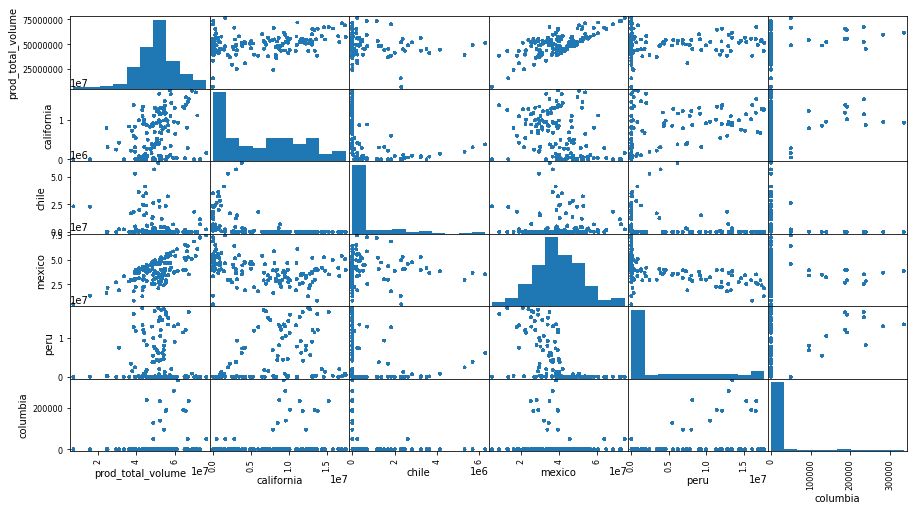

In [5]:
#EDA with scatter matrix
pd.plotting.scatter_matrix(prices_prod_df.iloc[:,14:21], figsize=(15,8));

In [6]:
# Drop the non-beneficial columns, 'status' and 'prod'.
prices_prod_df.drop(['year_month', 'date', 'status', 'prod'],axis=1, inplace=True)
prices_prod_df

,geography,type,avg_price,price_total_volume,four_zero_four_six_units,four_two_two_five_units,four_seven_seven_zero_units,total_bags,s_bags,l_bags,xl_bags,prod_total_volume,california,chile,mexico,peru,columbia,year,month,day
0,Albany,conventional,1.42,95246.38,2897.41,76570.67,44.00,15734.30,10012.80,5721.50,0.00,52758905,830821,449003,51479081,0,0,2018,1,14
1,Albany,organic,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.00,52758905,830821,449003,51479081,0,0,2018,1,14
2,Albany,conventional,1.69,135196.35,3133.37,116520.88,88.78,15453.32,10023.79,5429.53,0.00,54698266,2913663,445127,51339476,0,0,2018,1,21
3,Albany,organic,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.00,54698266,2913663,445127,51339476,0,0,2018,1,21
4,Albany,conventional,1.57,93625.03,3101.17,74627.23,55.59,15841.04,11614.79,4159.58,66.67,45299201,2698356,95491,42505354,0,0,2018,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,Total U.S.,organic,1.62,1754057.30,105106.37,144137.69,4186.01,1500627.23,848427.68,652190.75,8.80,52693480,8453470,0,39925907,4314102,0,2020,9,6
14468,West,conventional,0.95,9026449.59,1975837.16,1152252.54,33199.60,5864954.14,2726358.78,3060566.48,78028.88,52693480,8453470,0,39925907,4314102,0,2020,9,6
14469,West,organic,1.58,315771.42,31032.50,28880.42,1192.43,254666.07,100807.93,153849.34,8.80,52693480,8453470,0,39925907,4314102,0,2020,9,6
14470,West Tex/New Mexico,conventional,0.75,1212992.28,397029.46,76486.29,39407.07,700069.46,482659.19,215394.65,2015.62,52693480,8453470,0,39925907,4314102,0,2020,9,6


In [7]:
# Remove rows that have at least 1 null value.
for column in prices_prod_df.columns:
        print(f"Column {column}) has {prices_prod_df[column].isnull().sum()} null values")

Column geography) has 0 null values
Column type) has 0 null values
Column avg_price) has 0 null values
Column price_total_volume) has 0 null values
Column four_zero_four_six_units) has 0 null values
Column four_two_two_five_units) has 0 null values
Column four_seven_seven_zero_units) has 0 null values
Column total_bags) has 0 null values
Column s_bags) has 0 null values
Column l_bags) has 0 null values
Column xl_bags) has 0 null values
Column prod_total_volume) has 0 null values
Column california) has 0 null values
Column chile) has 0 null values
Column mexico) has 0 null values
Column peru) has 0 null values
Column columbia) has 0 null values
Column year) has 0 null values
Column month) has 0 null values
Column day) has 0 null values


In [8]:
# all_prices_df= all_prices_df.dropna(subset = ['avg_price'])
prices_prod_df = prices_prod_df.dropna()
#all_prices_df

In [9]:
prices_prod_df

,geography,type,avg_price,price_total_volume,four_zero_four_six_units,four_two_two_five_units,four_seven_seven_zero_units,total_bags,s_bags,l_bags,xl_bags,prod_total_volume,california,chile,mexico,peru,columbia,year,month,day
0,Albany,conventional,1.42,95246.38,2897.41,76570.67,44.00,15734.30,10012.80,5721.50,0.00,52758905,830821,449003,51479081,0,0,2018,1,14
1,Albany,organic,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.00,52758905,830821,449003,51479081,0,0,2018,1,14
2,Albany,conventional,1.69,135196.35,3133.37,116520.88,88.78,15453.32,10023.79,5429.53,0.00,54698266,2913663,445127,51339476,0,0,2018,1,21
3,Albany,organic,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.00,54698266,2913663,445127,51339476,0,0,2018,1,21
4,Albany,conventional,1.57,93625.03,3101.17,74627.23,55.59,15841.04,11614.79,4159.58,66.67,45299201,2698356,95491,42505354,0,0,2018,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,Total U.S.,organic,1.62,1754057.30,105106.37,144137.69,4186.01,1500627.23,848427.68,652190.75,8.80,52693480,8453470,0,39925907,4314102,0,2020,9,6
14468,West,conventional,0.95,9026449.59,1975837.16,1152252.54,33199.60,5864954.14,2726358.78,3060566.48,78028.88,52693480,8453470,0,39925907,4314102,0,2020,9,6
14469,West,organic,1.58,315771.42,31032.50,28880.42,1192.43,254666.07,100807.93,153849.34,8.80,52693480,8453470,0,39925907,4314102,0,2020,9,6
14470,West Tex/New Mexico,conventional,0.75,1212992.28,397029.46,76486.29,39407.07,700069.46,482659.19,215394.65,2015.62,52693480,8453470,0,39925907,4314102,0,2020,9,6


In [10]:
#all_prices_df.groupby('year').size()

In [11]:
#all_prices_df.groupby('month').size()

In [12]:
#all_prices_df.groupby('day').size()

In [13]:
# Determine the number of unique values in each column.
prices_prod_cat = prices_prod_df.dtypes[prices_prod_df.dtypes == "object"].index.tolist()
prices_prod_df[prices_prod_cat].nunique()

geography    54
type          3
dtype: int64

In [14]:
# Why is there 2 "convential" types?
prices_prod_df.groupby('type').size()

type
conventional     4266
conventional     2970
organic          7236
dtype: int64

In [15]:
prices_prod_df.loc[prices_prod_df['type'] == 'conventional ', 'type'] = 'conventional' 

In [16]:
prices_prod_df.groupby('type').size()

type
conventional    7236
organic         7236
dtype: int64

In [17]:
prices_prod_cat = prices_prod_df.dtypes[prices_prod_df.dtypes == "object"].index.tolist()
prices_prod_df[prices_prod_cat].nunique()

geography    54
type          2
dtype: int64

In [18]:
prices_prod_cat = pd.get_dummies(data=prices_prod_df, columns=['geography','type'])
prices_prod_cat

,avg_price,price_total_volume,four_zero_four_six_units,four_two_two_five_units,four_seven_seven_zero_units,total_bags,s_bags,l_bags,xl_bags,prod_total_volume,...,geography_Southeast,geography_Spokane,geography_St. Louis,geography_Syracuse,geography_Tampa,geography_Total U.S.,geography_West,geography_West Tex/New Mexico,type_conventional,type_organic
0,1.42,95246.38,2897.41,76570.67,44.00,15734.30,10012.80,5721.50,0.00,52758905,...,0,0,0,0,0,0,0,0,1,0
1,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.00,52758905,...,0,0,0,0,0,0,0,0,0,1
2,1.69,135196.35,3133.37,116520.88,88.78,15453.32,10023.79,5429.53,0.00,54698266,...,0,0,0,0,0,0,0,0,1,0
3,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.00,54698266,...,0,0,0,0,0,0,0,0,0,1
4,1.57,93625.03,3101.17,74627.23,55.59,15841.04,11614.79,4159.58,66.67,45299201,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,1.62,1754057.30,105106.37,144137.69,4186.01,1500627.23,848427.68,652190.75,8.80,52693480,...,0,0,0,0,0,1,0,0,0,1
14468,0.95,9026449.59,1975837.16,1152252.54,33199.60,5864954.14,2726358.78,3060566.48,78028.88,52693480,...,0,0,0,0,0,0,1,0,1,0
14469,1.58,315771.42,31032.50,28880.42,1192.43,254666.07,100807.93,153849.34,8.80,52693480,...,0,0,0,0,0,0,1,0,0,1
14470,0.75,1212992.28,397029.46,76486.29,39407.07,700069.46,482659.19,215394.65,2015.62,52693480,...,0,0,0,0,0,0,0,1,1,0


In [19]:
# Create our target
y = prices_prod_cat.avg_price
y

# Create our features
X = prices_prod_cat
X = X.drop("avg_price", axis=1)
X

,price_total_volume,four_zero_four_six_units,four_two_two_five_units,four_seven_seven_zero_units,total_bags,s_bags,l_bags,xl_bags,prod_total_volume,california,...,geography_Southeast,geography_Spokane,geography_St. Louis,geography_Syracuse,geography_Tampa,geography_Total U.S.,geography_West,geography_West Tex/New Mexico,type_conventional,type_organic
0,95246.38,2897.41,76570.67,44.00,15734.30,10012.80,5721.50,0.00,52758905,830821,...,0,0,0,0,0,0,0,0,1,0
1,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.00,52758905,830821,...,0,0,0,0,0,0,0,0,0,1
2,135196.35,3133.37,116520.88,88.78,15453.32,10023.79,5429.53,0.00,54698266,2913663,...,0,0,0,0,0,0,0,0,1,0
3,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.00,54698266,2913663,...,0,0,0,0,0,0,0,0,0,1
4,93625.03,3101.17,74627.23,55.59,15841.04,11614.79,4159.58,66.67,45299201,2698356,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,1754057.30,105106.37,144137.69,4186.01,1500627.23,848427.68,652190.75,8.80,52693480,8453470,...,0,0,0,0,0,1,0,0,0,1
14468,9026449.59,1975837.16,1152252.54,33199.60,5864954.14,2726358.78,3060566.48,78028.88,52693480,8453470,...,0,0,0,0,0,0,1,0,1,0
14469,315771.42,31032.50,28880.42,1192.43,254666.07,100807.93,153849.34,8.80,52693480,8453470,...,0,0,0,0,0,0,1,0,0,1
14470,1212992.28,397029.46,76486.29,39407.07,700069.46,482659.19,215394.65,2015.62,52693480,8453470,...,0,0,0,0,0,0,0,1,1,0


In [20]:
X.columns.tolist()

['price_total_volume',
 'four_zero_four_six_units',
 'four_two_two_five_units',
 'four_seven_seven_zero_units',
 'total_bags',
 's_bags',
 'l_bags',
 'xl_bags',
 'prod_total_volume',
 'california',
 'chile',
 'mexico',
 'peru',
 'columbia',
 'year',
 'month',
 'day',
 'geography_Albany',
 'geography_Atlanta',
 'geography_Baltimore/Washington',
 'geography_Boise',
 'geography_Boston',
 'geography_Buffalo/Rochester',
 'geography_California',
 'geography_Charlotte',
 'geography_Chicago',
 'geography_Cincinnati/Dayton',
 'geography_Columbus',
 'geography_Dallas/Ft. Worth',
 'geography_Denver',
 'geography_Detroit',
 'geography_Grand Rapids',
 'geography_Great Lakes',
 'geography_Harrisburg/Scranton',
 'geography_Hartford/Springfield',
 'geography_Houston',
 'geography_Indianapolis',
 'geography_Jacksonville',
 'geography_Las Vegas',
 'geography_Los Angeles',
 'geography_Louisville',
 'geography_Miami/Ft. Lauderdale',
 'geography_Midsouth',
 'geography_Nashville',
 'geography_New Orleans/Mo

In [21]:
y

0        1.42
1        1.47
2        1.69
3        1.54
4        1.57
         ... 
14467    1.62
14468    0.95
14469    1.58
14470    0.75
14471    1.56
Name: avg_price, Length: 14472, dtype: float64

In [22]:
X

,price_total_volume,four_zero_four_six_units,four_two_two_five_units,four_seven_seven_zero_units,total_bags,s_bags,l_bags,xl_bags,prod_total_volume,california,...,geography_Southeast,geography_Spokane,geography_St. Louis,geography_Syracuse,geography_Tampa,geography_Total U.S.,geography_West,geography_West Tex/New Mexico,type_conventional,type_organic
0,95246.38,2897.41,76570.67,44.00,15734.30,10012.80,5721.50,0.00,52758905,830821,...,0,0,0,0,0,0,0,0,1,0
1,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.00,52758905,830821,...,0,0,0,0,0,0,0,0,0,1
2,135196.35,3133.37,116520.88,88.78,15453.32,10023.79,5429.53,0.00,54698266,2913663,...,0,0,0,0,0,0,0,0,1,0
3,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.00,54698266,2913663,...,0,0,0,0,0,0,0,0,0,1
4,93625.03,3101.17,74627.23,55.59,15841.04,11614.79,4159.58,66.67,45299201,2698356,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,1754057.30,105106.37,144137.69,4186.01,1500627.23,848427.68,652190.75,8.80,52693480,8453470,...,0,0,0,0,0,1,0,0,0,1
14468,9026449.59,1975837.16,1152252.54,33199.60,5864954.14,2726358.78,3060566.48,78028.88,52693480,8453470,...,0,0,0,0,0,0,1,0,1,0
14469,315771.42,31032.50,28880.42,1192.43,254666.07,100807.93,153849.34,8.80,52693480,8453470,...,0,0,0,0,0,0,1,0,0,1
14470,1212992.28,397029.46,76486.29,39407.07,700069.46,482659.19,215394.65,2015.62,52693480,8453470,...,0,0,0,0,0,0,0,1,1,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)


[1.44175211 1.0329537  1.05966515 ... 1.29589951 1.00939311 1.3724537 ]


In [25]:
print(y_pred.shape)
print(X_test.shape)

(3618,)
(3618, 73)


In [26]:
model.score(X_test, y_test)

0.6671324580158504

model score is 0.6671324580158504 with the following columns:
'price_total_volume',
 'four_zero_four_six_units',
 'four_two_two_five_units',
 'four_seven_seven_zero_units',
 'total_bags',
 's_bags',
 'l_bags',
 'xl_bags',
 'prod_total_volume',
 'california',
 'chile',
 'mexico',
 'peru',
 'columbia',
 'year',
 'month',
 'day',
 'geography_Albany',
 'geography_Atlanta',
 'geography_Baltimore/Washington',
 'geography_Boise',
 'geography_Boston',
 'geography_Buffalo/Rochester',
 'geography_California',
 'geography_Charlotte',
 'geography_Chicago',
 'geography_Cincinnati/Dayton',
 'geography_Columbus',
 'geography_Dallas/Ft. Worth',
 'geography_Denver',
 'geography_Detroit',
 'geography_Grand Rapids',
 'geography_Great Lakes',
 'geography_Harrisburg/Scranton',
 'geography_Hartford/Springfield',
 'geography_Houston',
 'geography_Indianapolis',
 'geography_Jacksonville',
 'geography_Las Vegas',
 'geography_Los Angeles',
 'geography_Louisville',
 'geography_Miami/Ft. Lauderdale',
 'geography_Midsouth',
 'geography_Nashville',
 'geography_New Orleans/Mobile',
 'geography_New York',
 'geography_Northeast',
 'geography_Northern New England',
 'geography_Orlando',
 'geography_Philadelphia',
 'geography_Phoenix/Tucson',
 'geography_Pittsburgh',
 'geography_Plains',
 'geography_Portland',
 'geography_Raleigh/Greensboro',
 'geography_Richmond/Norfolk',
 'geography_Roanoke',
 'geography_Sacramento',
 'geography_San Diego',
 'geography_San Francisco',
 'geography_Seattle',
 'geography_South Carolina',
 'geography_South Central',
 'geography_Southeast',
 'geography_Spokane',
 'geography_St. Louis',
 'geography_Syracuse',
 'geography_Tampa',
 'geography_Total U.S.',
 'geography_West',
 'geography_West Tex/New Mexico',
 'type_conventional',
 'type_organic'

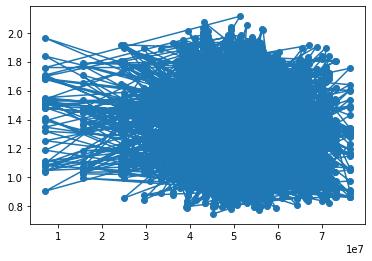

In [27]:
plt.scatter(X_test['prod_total_volume'], y_pred)
plt.plot(X_test['prod_total_volume'], y_pred)
plt.show()